<a href="https://www.kaggle.com/code/lalit7881/electricity-access-vs-gdp-97-7-accuracy?scriptVersionId=298851435" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-electricity-access-and-economic-indicators/global_electricity_access_economic_indicators.csv


In [2]:
df = pd.read_csv("/kaggle/input/global-electricity-access-and-economic-indicators/global_electricity_access_economic_indicators.csv")

In [3]:
df.head()

,country,date,GDP_Per_Capita_Current_USD,Total_Population,Population_Female_Percentage,Population_Male_Percentage,Electricity_Access_Urban_Percentage,Electricity_Access_Rural_Percentage,Total_Electricity_Output_GWh
0,Afghanistan,2000,174.930991,20130327.0,49.853544,50.146456,69.640984,NaN,687.7
1,Afghanistan,2001,138.706822,20284307.0,49.814443,50.185557,71.371780,NaN,691.1
2,Afghanistan,2002,178.954088,21378117.0,49.774819,50.225181,73.099968,NaN,722.2
3,Afghanistan,2003,198.871116,22733049.0,49.735361,50.264639,74.828354,NaN,976.0
4,Afghanistan,2004,221.763654,23560654.0,49.697774,50.302226,76.559761,NaN,780.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7381 non-null   object 
 1   date                                 7381 non-null   int64  
 2   GDP_Per_Capita_Current_USD           6433 non-null   float64
 3   Total_Population                     6625 non-null   float64
 4   Population_Female_Percentage         6625 non-null   float64
 5   Population_Male_Percentage           6625 non-null   float64
 6   Electricity_Access_Urban_Percentage  3675 non-null   float64
 7   Electricity_Access_Rural_Percentage  3376 non-null   float64
 8   Total_Electricity_Output_GWh         3647 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 519.1+ KB


In [5]:
df.describe()

,date,GDP_Per_Capita_Current_USD,Total_Population,Population_Female_Percentage,Population_Male_Percentage,Electricity_Access_Urban_Percentage,Electricity_Access_Rural_Percentage,Total_Electricity_Output_GWh
count,7381.000000,6433.000000,6.625000e+03,6625.000000,6625.000000,3675.000000,3376.000000,3.647000e+03
mean,2011.603848,14909.428920,2.886783e+08,50.046758,49.953242,88.756413,72.852278,8.696355e+04
std,7.117687,23577.553825,9.013583e+08,2.611407,2.611407,20.502681,35.999818,3.957378e+05
min,2000.000000,109.593814,9.544000e+03,23.817993,45.048132,0.000000,0.007659,0.000000e+00
25%,2005.000000,1563.105911,1.463495e+06,49.570081,48.944370,87.972973,42.387517,3.955000e+02
50%,2011.000000,5126.053316,9.745953e+06,50.304102,49.695898,99.547373,95.904735,4.980000e+03
75%,2018.000000,18780.127512,6.000225e+07,51.055630,50.429919,100.000000,100.000000,3.639900e+04
max,2024.000000,288001.433369,8.141809e+09,54.951868,76.182007,100.000000,100.000000,5.844158e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              7381 non-null   object 
 1   date                                 7381 non-null   int64  
 2   GDP_Per_Capita_Current_USD           6433 non-null   float64
 3   Total_Population                     6625 non-null   float64
 4   Population_Female_Percentage         6625 non-null   float64
 5   Population_Male_Percentage           6625 non-null   float64
 6   Electricity_Access_Urban_Percentage  3675 non-null   float64
 7   Electricity_Access_Rural_Percentage  3376 non-null   float64
 8   Total_Electricity_Output_GWh         3647 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 519.1+ KB


In [7]:
df.isnull().sum()

country                                   0
date                                      0
GDP_Per_Capita_Current_USD              948
Total_Population                        756
Population_Female_Percentage            756
Population_Male_Percentage              756
Electricity_Access_Urban_Percentage    3706
Electricity_Access_Rural_Percentage    4005
Total_Electricity_Output_GWh           3734
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

country                                 object
date                                     int64
GDP_Per_Capita_Current_USD             float64
Total_Population                       float64
Population_Female_Percentage           float64
Population_Male_Percentage             float64
Electricity_Access_Urban_Percentage    float64
Electricity_Access_Rural_Percentage    float64
Total_Electricity_Output_GWh           float64
dtype: object

In [10]:
df.shape

(7381, 9)

In [11]:
df.columns

Index(['country', 'date', 'GDP_Per_Capita_Current_USD', 'Total_Population',
       'Population_Female_Percentage', 'Population_Male_Percentage',
       'Electricity_Access_Urban_Percentage',
       'Electricity_Access_Rural_Percentage', 'Total_Electricity_Output_GWh'],
      dtype='object')

In [12]:
df.nunique()

country                                 309
date                                     25
GDP_Per_Capita_Current_USD             6385
Total_Population                       6569
Population_Female_Percentage           6577
Population_Male_Percentage             6576
Electricity_Access_Urban_Percentage    2169
Electricity_Access_Rural_Percentage    2081
Total_Electricity_Output_GWh           3323
dtype: int64

In [13]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_pct
})

print(missing_df)

                                     Missing Count  Missing %
Electricity_Access_Rural_Percentage           4005      54.26
Total_Electricity_Output_GWh                  3734      50.59
Electricity_Access_Urban_Percentage           3706      50.21
GDP_Per_Capita_Current_USD                     948      12.84
Total_Population                               756      10.24
Population_Male_Percentage                     756      10.24
Population_Female_Percentage                   756      10.24
country                                          0       0.00
date                                             0       0.00


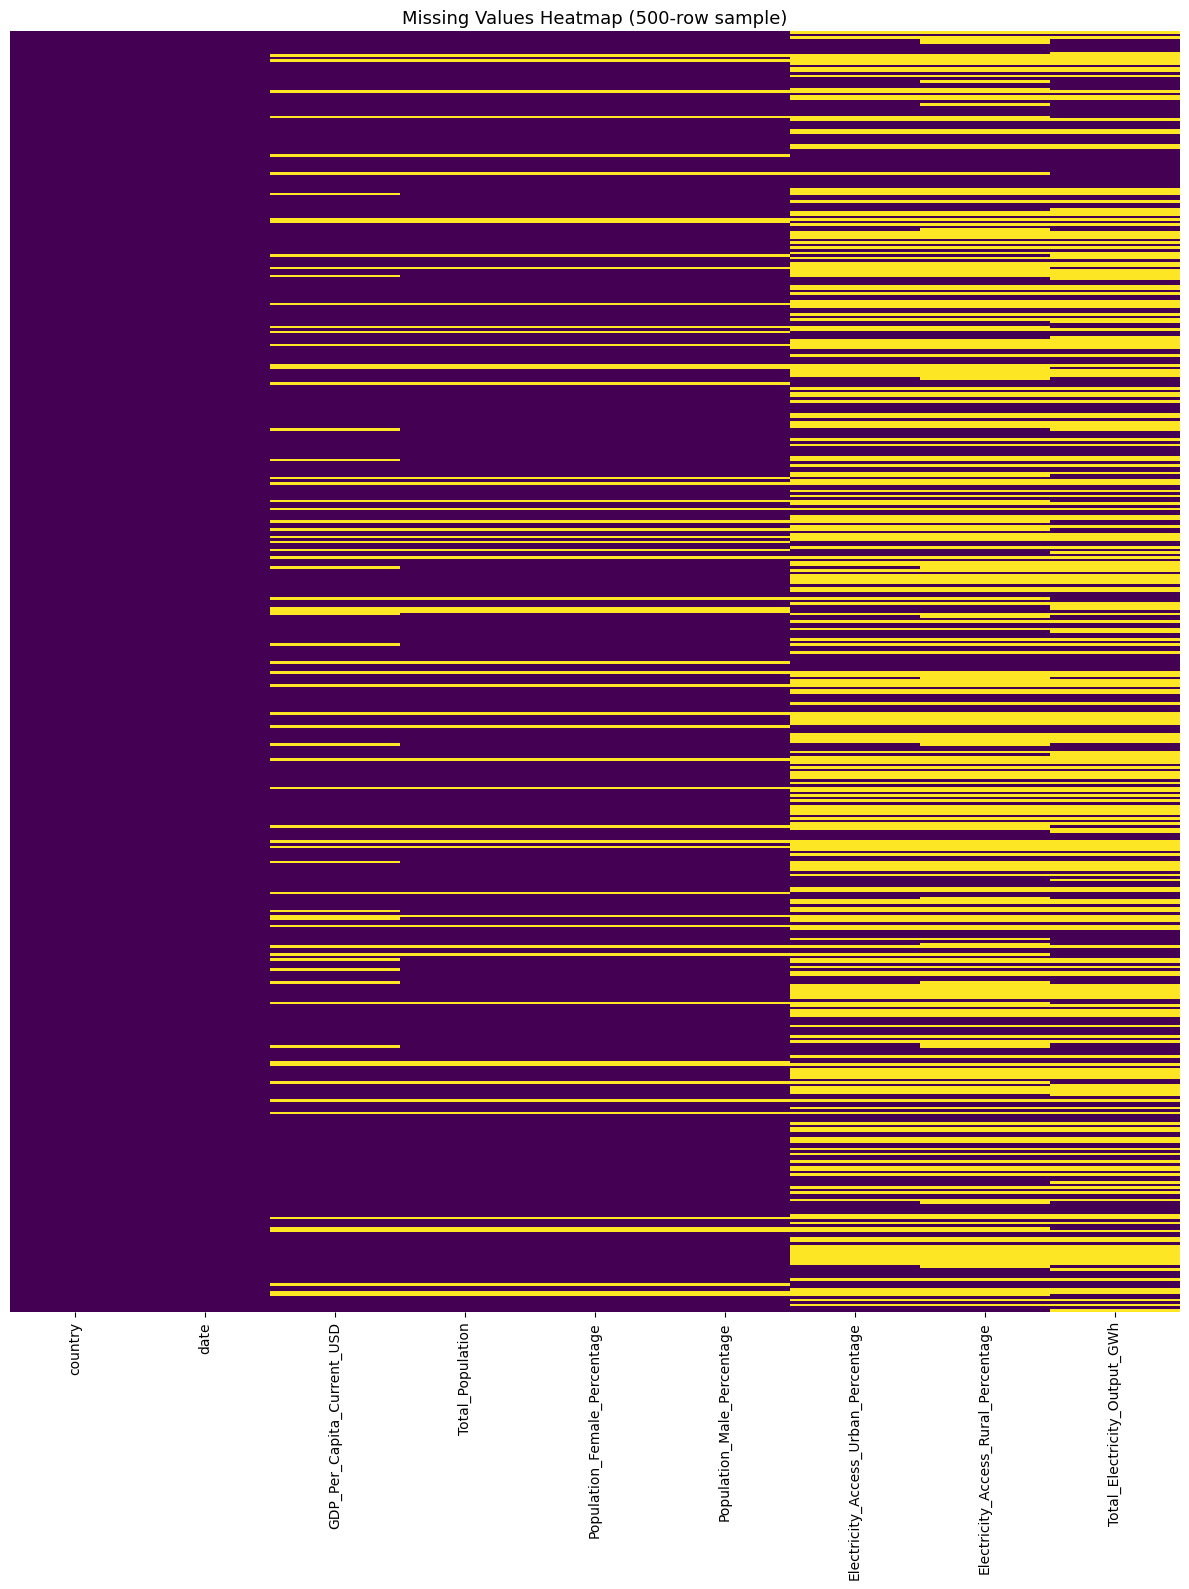

In [14]:
plt.figure(figsize=(12, 16))
sns.heatmap(
    df.sample(500, random_state=42).isnull(),
    cbar=False,
    yticklabels=False,
    cmap="viridis"
)

plt.title("Missing Values Heatmap (500-row sample)", fontsize=13)
plt.tight_layout()
plt.show()

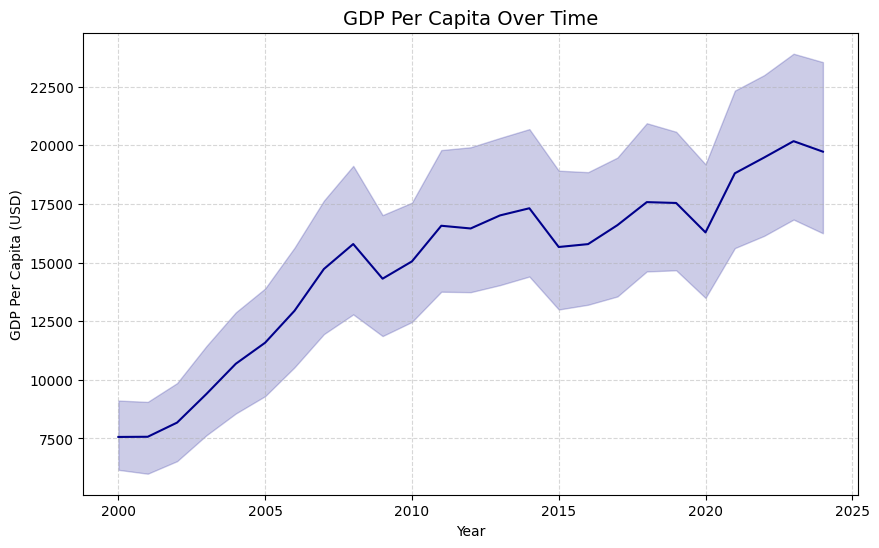

In [15]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="date",
    y="GDP_Per_Capita_Current_USD",
    color="darkblue"
)

plt.title("GDP Per Capita Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("GDP Per Capita (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

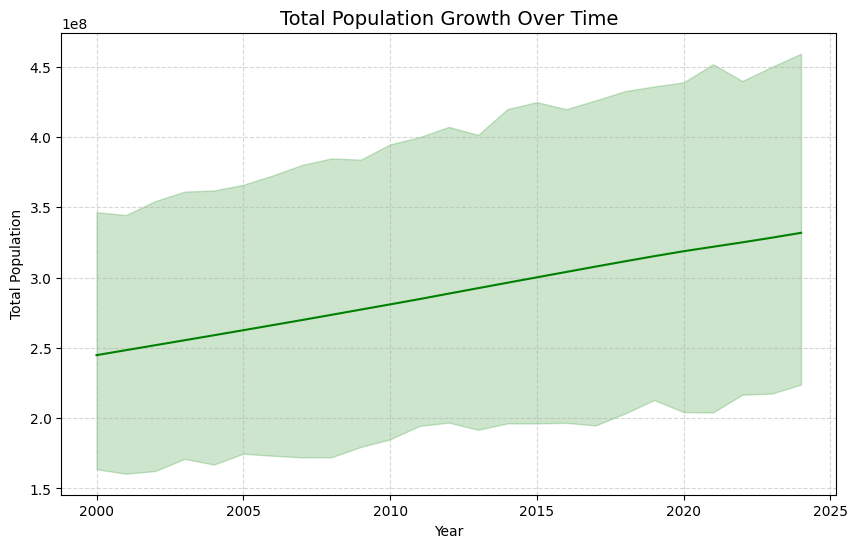

In [16]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="date",
    y="Total_Population",
    color="green"
)

plt.title("Total Population Growth Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

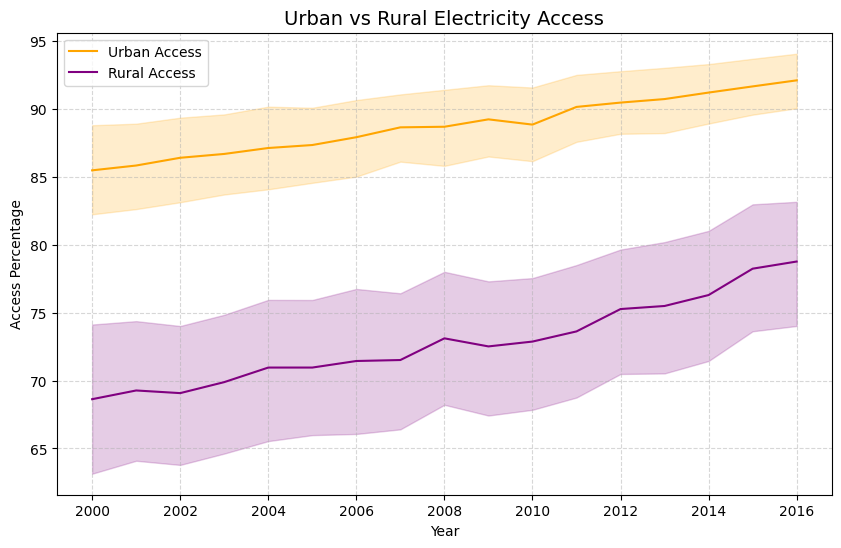

In [17]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="date",
    y="Electricity_Access_Urban_Percentage",
    label="Urban Access",
    color="orange"
)

sns.lineplot(
    data=df,
    x="date",
    y="Electricity_Access_Rural_Percentage",
    label="Rural Access",
    color="purple"
)

plt.title("Urban vs Rural Electricity Access", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Access Percentage")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

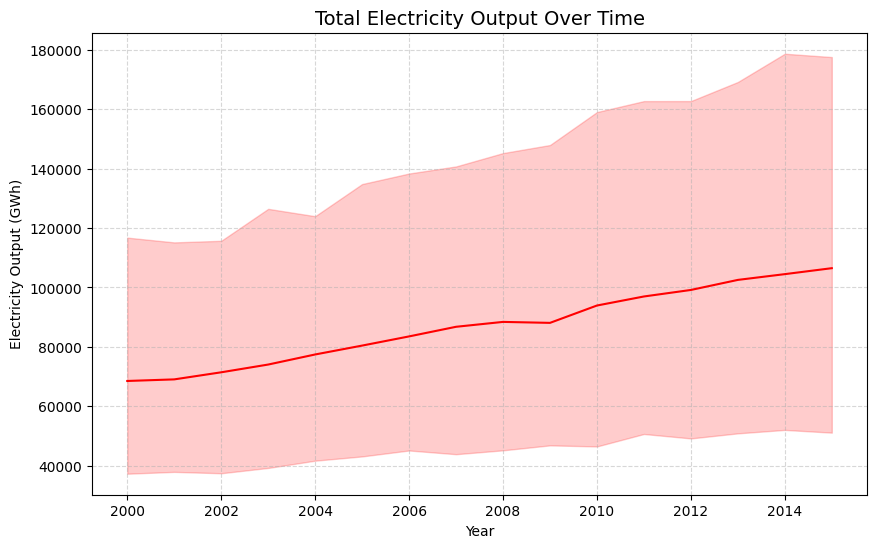

In [18]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x="date",
    y="Total_Electricity_Output_GWh",
    color="red"
)

plt.title("Total Electricity Output Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Electricity Output (GWh)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


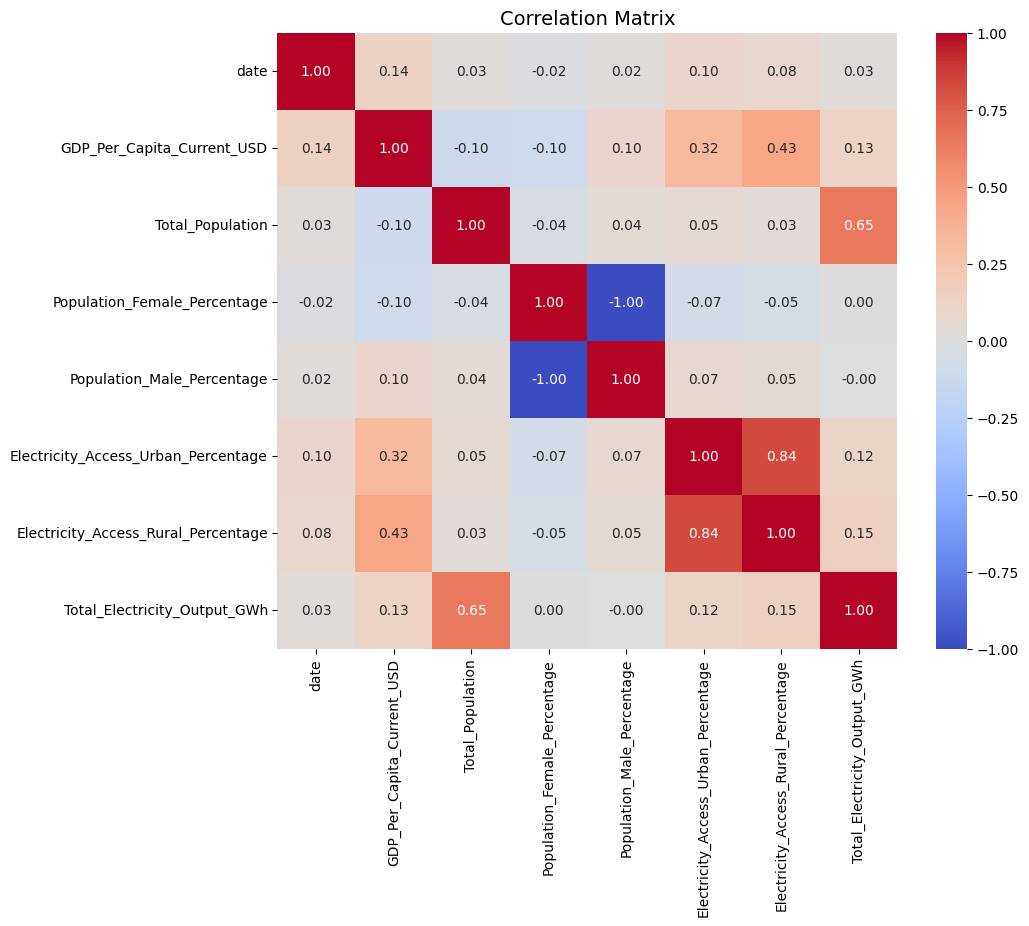

In [19]:
plt.figure(figsize=(10,8))

corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix", fontsize=14)
plt.show()

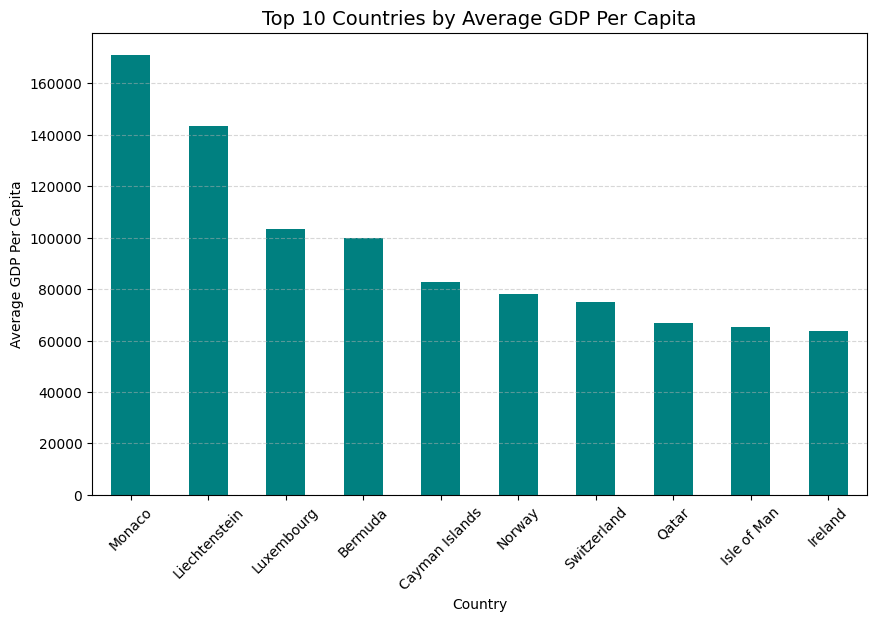

In [20]:
top_gdp = (
    df.groupby("country")["GDP_Per_Capita_Current_USD"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))

top_gdp.plot(
    kind="bar",
    color="teal"
)

plt.title("Top 10 Countries by Average GDP Per Capita", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Average GDP Per Capita")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [21]:
full_access = df[
    (df["date"] <= 2015) &
    (df["Electricity_Access_Urban_Percentage"] == 100) &
    (df["Electricity_Access_Rural_Percentage"] == 100)
]["country"].unique()

# Step 2: Print results
print(f"\n✅ Total Countries with 100% Access by 2015: {len(full_access)}\n")

for i, country in enumerate(sorted(full_access), 1):
    print(f"{i}. {country}")


✅ Total Countries with 100% Access by 2015: 81

1. Albania
2. Andorra
3. Armenia
4. Australia
5. Austria
6. Azerbaijan
7. Bahrain
8. Barbados
9. Belarus
10. Belgium
11. Bosnia and Herzegovina
12. Brunei Darussalam
13. Bulgaria
14. Canada
15. Channel Islands
16. China
17. Croatia
18. Cuba
19. Curacao
20. Cyprus
21. Czech Republic
22. Denmark
23. Estonia
24. Faeroe Islands
25. Finland
26. France
27. French Polynesia
28. Georgia
29. Germany
30. Greece
31. Greenland
32. Guam
33. Hungary
34. Iceland
35. Ireland
36. Isle of Man
37. Israel
38. Italy
39. Japan
40. Kazakhstan
41. Korea, Rep.
42. Kuwait
43. Latvia
44. Lebanon
45. Liechtenstein
46. Lithuania
47. Luxembourg
48. Macedonia, FYR
49. Maldives
50. Malta
51. Moldova
52. Netherlands
53. New Caledonia
54. New Zealand
55. Northern Mariana Islands
56. Norway
57. Oman
58. Poland
59. Portugal
60. Puerto Rico
61. Qatar
62. Romania
63. Russian Federation
64. San Marino
65. Saudi Arabia
66. Slovak Republic
67. Slovenia
68. Spain
69. Sweden
70. 

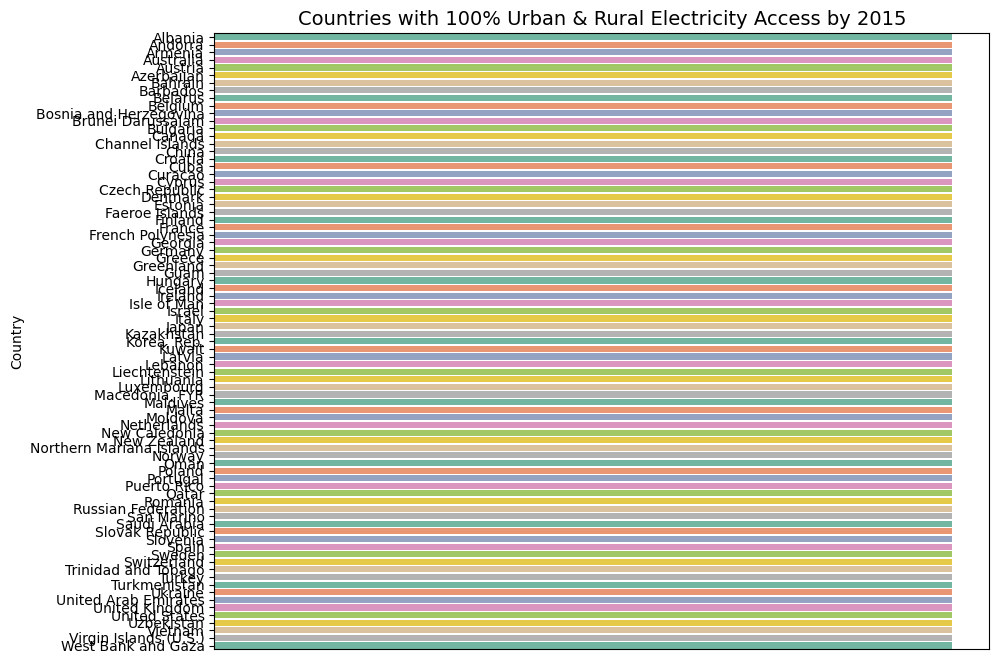

In [22]:
countries_sorted = sorted(full_access)

plt.figure(figsize=(10, 8))

sns.barplot(
    y=countries_sorted,
    x=[1]*len(countries_sorted),  # Just to create bars
    palette="Set2"
)

plt.title("Countries with 100% Urban & Rural Electricity Access by 2015", fontsize=14)
plt.xlabel("")
plt.ylabel("Country")
plt.xticks([])  # Hide x-axis numbers
plt.show()

In [23]:
rural_trend = (
    df[
        (df["date"].between(2000, 2016)) &
        (df["Electricity_Access_Rural_Percentage"].notna())
    ]
    .groupby("date")["Electricity_Access_Rural_Percentage"]
    .mean()
    .reset_index()
)

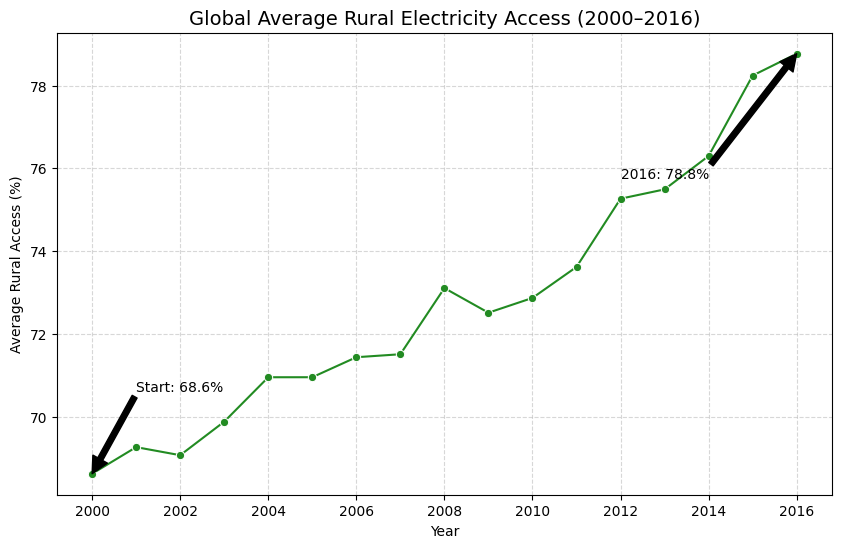

In [24]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=rural_trend,
    x="date",
    y="Electricity_Access_Rural_Percentage",
    marker="o",
    color="forestgreen"
)

plt.title("Global Average Rural Electricity Access (2000–2016)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Rural Access (%)")
plt.grid(True, linestyle="--", alpha=0.5)

# Annotate start value
plt.annotate(
    f"Start: {rural_trend.iloc[0]['Electricity_Access_Rural_Percentage']:.1f}%",
    xy=(2000, rural_trend.iloc[0]["Electricity_Access_Rural_Percentage"]),
    xytext=(2001, rural_trend.iloc[0]["Electricity_Access_Rural_Percentage"] + 2),
    arrowprops=dict(facecolor='black'),
)

# Annotate end value
plt.annotate(
    f"2016: {rural_trend.iloc[-1]['Electricity_Access_Rural_Percentage']:.1f}%",
    xy=(2016, rural_trend.iloc[-1]["Electricity_Access_Rural_Percentage"]),
    xytext=(2012, rural_trend.iloc[-1]["Electricity_Access_Rural_Percentage"] - 3),
    arrowprops=dict(facecolor='black'),
)

plt.show()

In [25]:
top10_gdp = (
    df[df["date"] == 2023]
    .dropna(subset=["GDP_Per_Capita_Current_USD"])
    .nlargest(10, "GDP_Per_Capita_Current_USD")
    [["country", "GDP_Per_Capita_Current_USD", "Total_Population"]]
    .reset_index(drop=True)
)

top10_gdp.index += 1

print("\nTop 10 Countries by GDP Per Capita (2023)\n")
print(top10_gdp)


Top 10 Countries by GDP Per Capita (2023)

           country  GDP_Per_Capita_Current_USD  Total_Population
1           Monaco               256799.788613           38956.0
2    Liechtenstein               206780.590353           39846.0
3       Luxembourg               133230.619179          666430.0
4          Bermuda               132604.439086           64698.0
5          Ireland               106818.917131         5311538.0
6      Switzerland               100623.549627         8888822.0
7   Cayman Islands                99143.518024           73038.0
8           Norway                87497.217965         5519601.0
9        Singapore                85412.230345         5917648.0
10         Iceland                82138.789297          385663.0


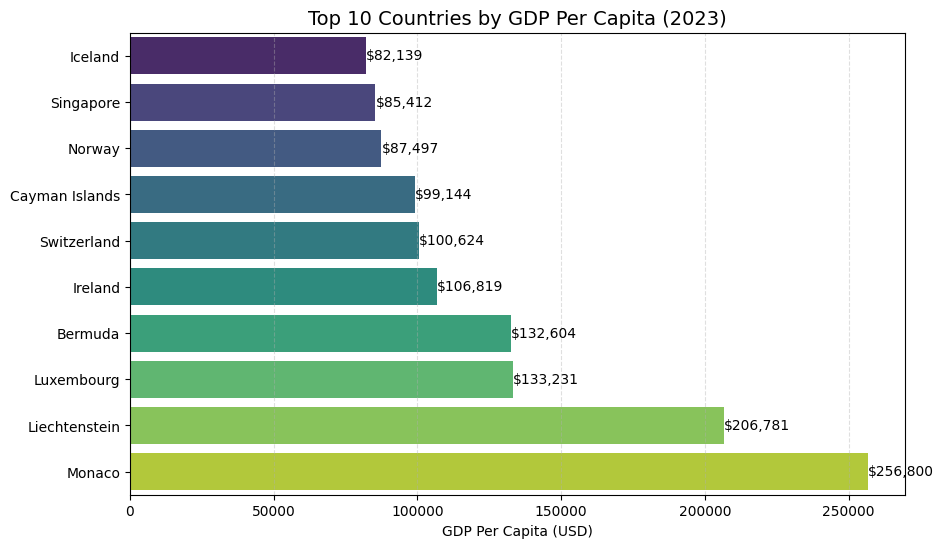

In [26]:
# Sort for better horizontal display
top10_sorted = top10_gdp.sort_values("GDP_Per_Capita_Current_USD")

plt.figure(figsize=(10,6))

sns.barplot(
    data=top10_sorted,
    x="GDP_Per_Capita_Current_USD",
    y="country",
    palette="viridis"
)

plt.title("Top 10 Countries by GDP Per Capita (2023)", fontsize=14)
plt.xlabel("GDP Per Capita (USD)")
plt.ylabel("")

# Add value labels
for index, value in enumerate(top10_sorted["GDP_Per_Capita_Current_USD"]):
    plt.text(value, index, f"${value:,.0f}", va='center')

plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.show()

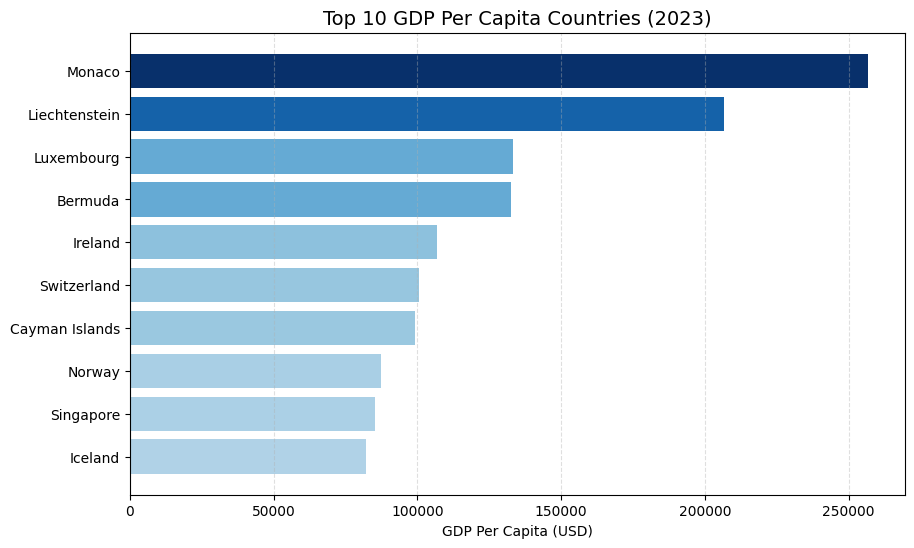

In [27]:
plt.figure(figsize=(10,6))

bars = plt.barh(
    top10_sorted["country"],
    top10_sorted["GDP_Per_Capita_Current_USD"],
    color=plt.cm.Blues(
        top10_sorted["GDP_Per_Capita_Current_USD"] /
        top10_sorted["GDP_Per_Capita_Current_USD"].max()
    )
)

plt.title("Top 10 GDP Per Capita Countries (2023)", fontsize=14)
plt.xlabel("GDP Per Capita (USD)")

plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.show()

In [28]:
pop_trend = (
    df[df["Total_Population"].notna()]
    .groupby("date")["Total_Population"]
    .sum()
    .reset_index()
)

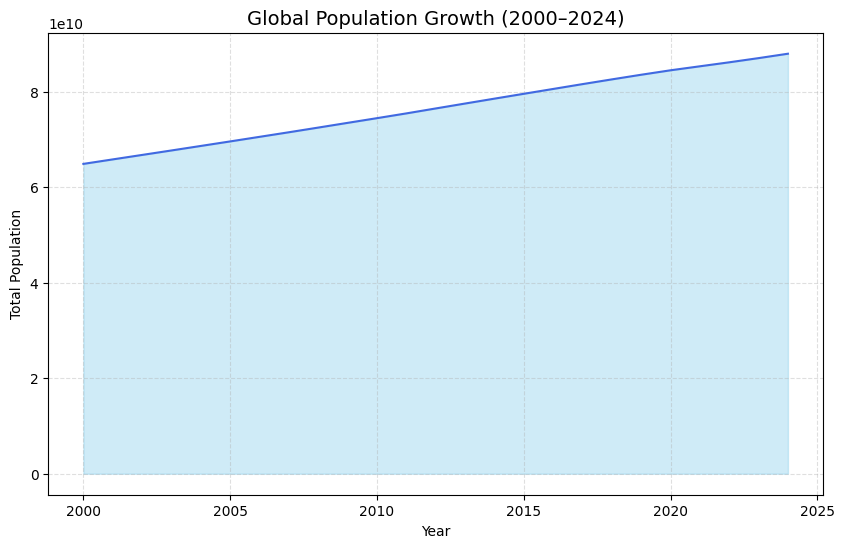

In [29]:
plt.figure(figsize=(10,6))

# Line plot
sns.lineplot(
    data=pop_trend,
    x="date",
    y="Total_Population",
    color="royalblue"
)

# Fill area
plt.fill_between(
    pop_trend["date"],
    pop_trend["Total_Population"],
    color="skyblue",
    alpha=0.4
)

plt.title("Global Population Growth (2000–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Population")

plt.grid(True, linestyle="--", alpha=0.4)

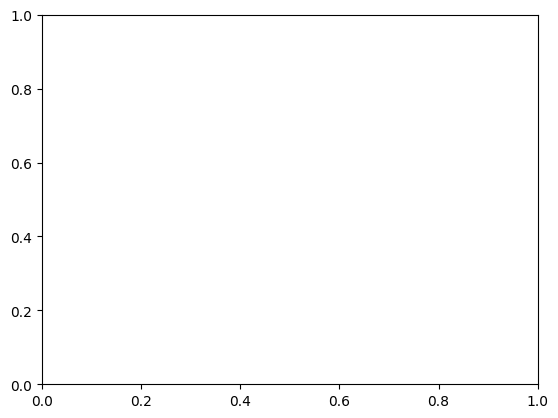

In [30]:
milestones = {
    2000: "6.1B",
    2010: "~6.9B",
    2022: "8B milestone",
    2024: "8.1B+"
}

for year, label in milestones.items():
    value = pop_trend[pop_trend["date"] == year]["Total_Population"].values
    if len(value):
        plt.annotate(
            label,
            xy=(year, value[0]),
            xytext=(year, value[0] * 1.02),
            arrowprops=dict(facecolor="black"),
            fontsize=9,
            backgroundcolor="white"
        )

plt.show()

In [31]:
from scipy import stats

In [32]:
corr_df = df[
    ["GDP_Per_Capita_Current_USD",
     "Electricity_Access_Urban_Percentage",
     "Electricity_Access_Rural_Percentage"]
].dropna()

# Log transform GDP
corr_df["Log_GDP"] = np.log10(corr_df["GDP_Per_Capita_Current_USD"])

In [33]:
for col in ["Electricity_Access_Urban_Percentage",
            "Electricity_Access_Rural_Percentage"]:

    pearson_r, _ = stats.pearsonr(corr_df["Log_GDP"], corr_df[col])
    spearman_r, _ = stats.spearmanr(corr_df["Log_GDP"], corr_df[col])

    name = "Urban" if "Urban" in col else "Rural"
    print(f"{name} Access → Pearson r: {pearson_r:.3f} | Spearman ρ: {spearman_r:.3f}")

Urban Access → Pearson r: 0.601 | Spearman ρ: 0.801
Rural Access → Pearson r: 0.718 | Spearman ρ: 0.808


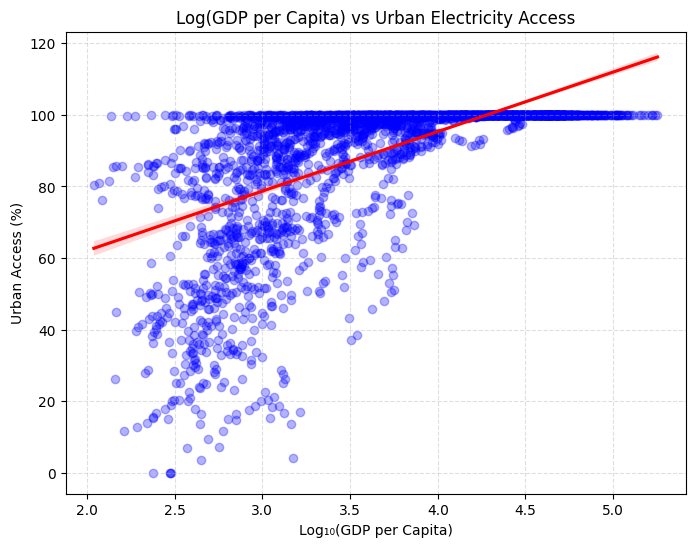

In [34]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=corr_df,
    x="Log_GDP",
    y="Electricity_Access_Urban_Percentage",
    scatter_kws={"alpha":0.3, "color":"blue"},
    line_kws={"color":"red"}
)

plt.title("Log(GDP per Capita) vs Urban Electricity Access")
plt.xlabel("Log₁₀(GDP per Capita)")
plt.ylabel("Urban Access (%)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

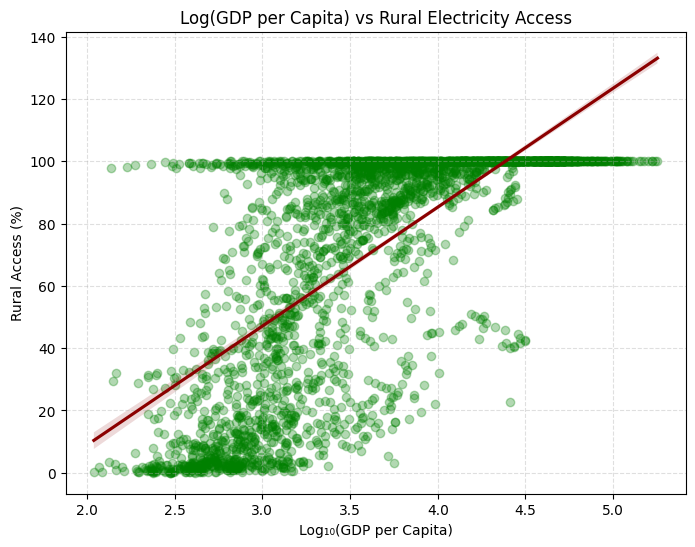

In [35]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=corr_df,
    x="Log_GDP",
    y="Electricity_Access_Rural_Percentage",
    scatter_kws={"alpha":0.3, "color":"green"},
    line_kws={"color":"darkred"}
)

plt.title("Log(GDP per Capita) vs Rural Electricity Access")
plt.xlabel("Log₁₀(GDP per Capita)")
plt.ylabel("Rural Access (%)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

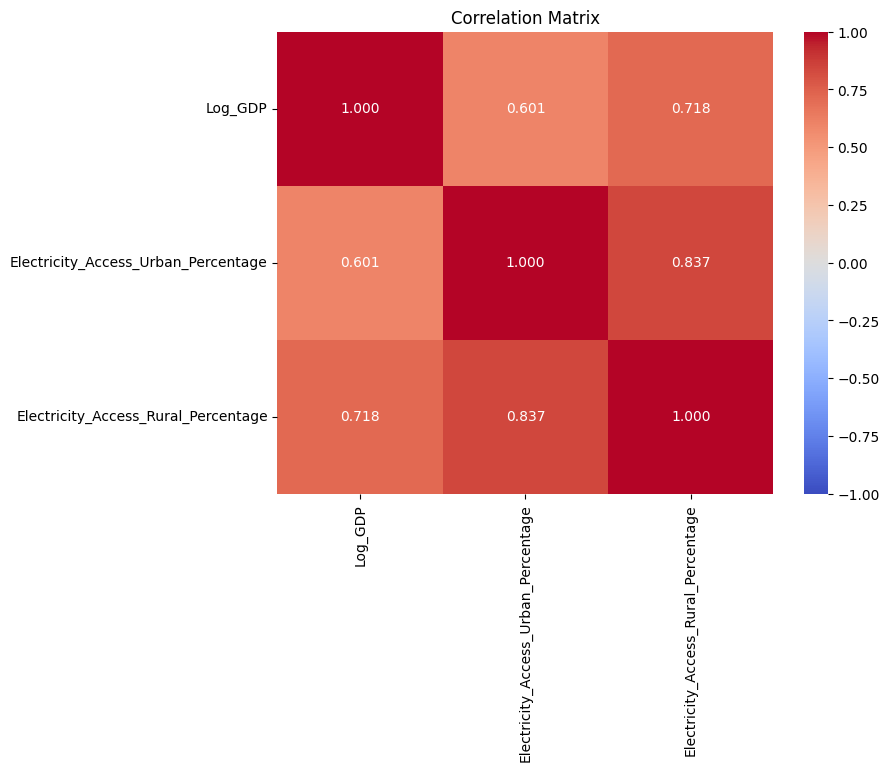

In [36]:
plt.figure(figsize=(8,6))

corr_matrix = corr_df[
    ["Log_GDP",
     "Electricity_Access_Urban_Percentage",
     "Electricity_Access_Rural_Percentage"]
].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".3f",
    vmin=-1,
    vmax=1
)

plt.title("Correlation Matrix")
plt.show()

In [37]:
rural_data = df[
    (df["Electricity_Access_Rural_Percentage"].notna()) &
    (df["date"].isin([2000, 2016]))
]

# Pivot table
rural_pivot = rural_data.pivot_table(
    index="country",
    columns="date",
    values="Electricity_Access_Rural_Percentage"
)

# Drop countries missing either year
rural_pivot = rural_pivot.dropna()

# Rename columns
rural_pivot.columns = ["Access_2000", "Access_2016"]

# Calculate growth
rural_pivot["Growth_pp"] = (
    rural_pivot["Access_2016"] - rural_pivot["Access_2000"]
)

# Categorize starting level
rural_pivot["Start_Level"] = pd.cut(
    rural_pivot["Access_2000"],
    bins=[0, 25, 50, 75, 100],
    labels=["<25%", "25-50%", "50-75%", ">75%"]
)

# Top 15 fastest growth
top15 = rural_pivot.sort_values("Growth_pp", ascending=False).head(15).reset_index()


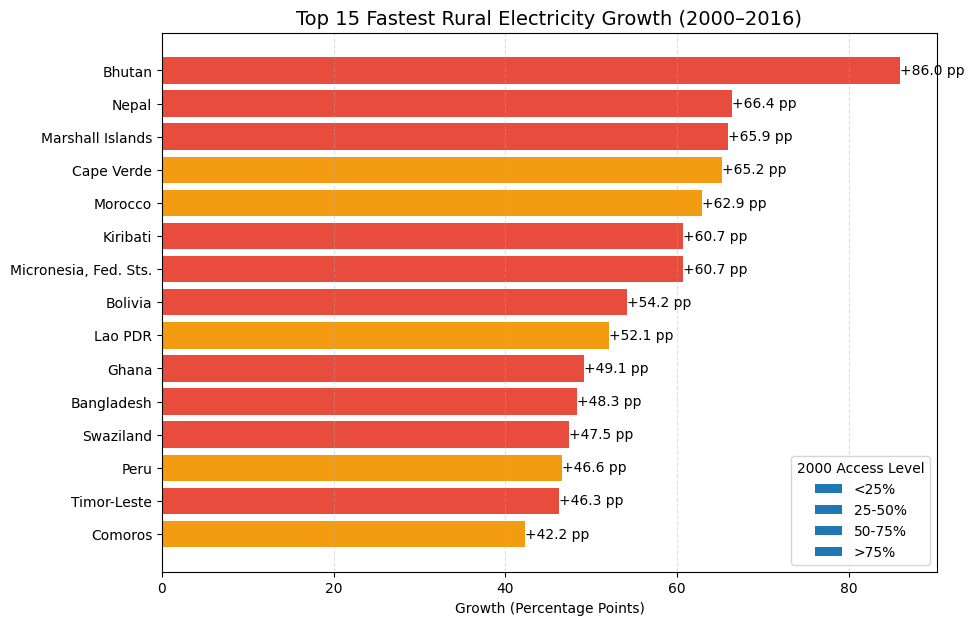

In [38]:
# Define color map
color_map = {
    "<25%": "#e74c3c",
    "25-50%": "#f39c12",
    "50-75%": "#f1c40f",
    ">75%": "#2ecc71"
}

colors = top15["Start_Level"].map(color_map)

plt.figure(figsize=(10,7))

bars = plt.barh(
    top15["country"],
    top15["Growth_pp"],
    color=colors
)

plt.gca().invert_yaxis()

plt.title("Top 15 Fastest Rural Electricity Growth (2000–2016)", fontsize=14)
plt.xlabel("Growth (Percentage Points)")
plt.ylabel("")

# Add value labels
for i, value in enumerate(top15["Growth_pp"]):
    plt.text(value, i, f"+{value:.1f} pp", va='center')

plt.grid(axis="x", linestyle="--", alpha=0.4)

# Legend
for label, color in color_map.items():
    plt.barh([], [], color=color, label=label)

plt.legend(title="2000 Access Level")
plt.show()

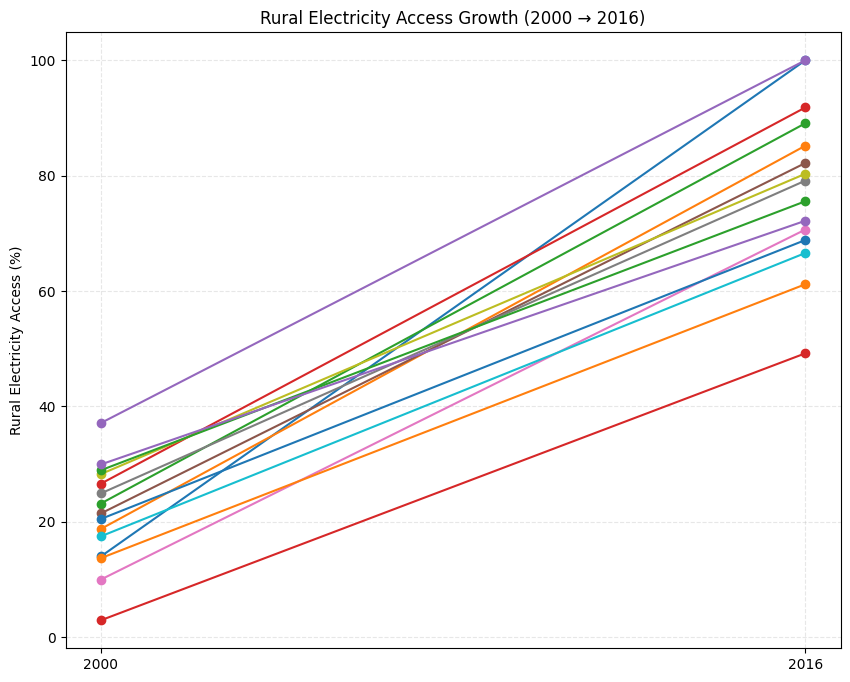

In [39]:
plt.figure(figsize=(10,8))

for _, row in top15.iterrows():
    plt.plot(
        [0, 1],
        [row["Access_2000"], row["Access_2016"]],
        marker="o"
    )

plt.xticks([0, 1], ["2000", "2016"])
plt.ylabel("Rural Electricity Access (%)")
plt.title("Rural Electricity Access Growth (2000 → 2016)")

plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [40]:
scatter_df = df[df["date"] == 2015].dropna(
    subset=[
        "Total_Population",
        "Total_Electricity_Output_GWh",
        "GDP_Per_Capita_Current_USD"
    ]
).copy()

# Calculate electricity per capita (kWh)
scatter_df["Elec_Per_Capita_kWh"] = (
    scatter_df["Total_Electricity_Output_GWh"] * 1e6 /
    scatter_df["Total_Population"]
)

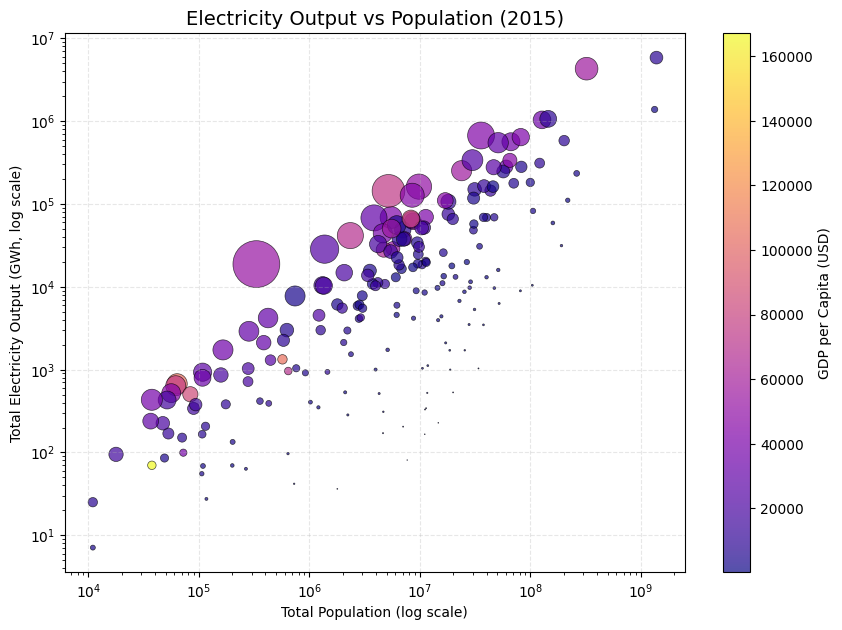

In [41]:
plt.figure(figsize=(10,7))

scatter = plt.scatter(
    scatter_df["Total_Population"],
    scatter_df["Total_Electricity_Output_GWh"],
    s=scatter_df["Elec_Per_Capita_kWh"] / 50,   # scale bubble size
    c=scatter_df["GDP_Per_Capita_Current_USD"],
    cmap="plasma",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5
)

plt.xscale("log")
plt.yscale("log")

plt.title("Electricity Output vs Population (2015)", fontsize=14)
plt.xlabel("Total Population (log scale)")
plt.ylabel("Total Electricity Output (GWh, log scale)")

plt.grid(True, linestyle="--", alpha=0.3)

# Add colorbar for GDP
cbar = plt.colorbar(scatter)
cbar.set_label("GDP per Capita (USD)")

plt.show()

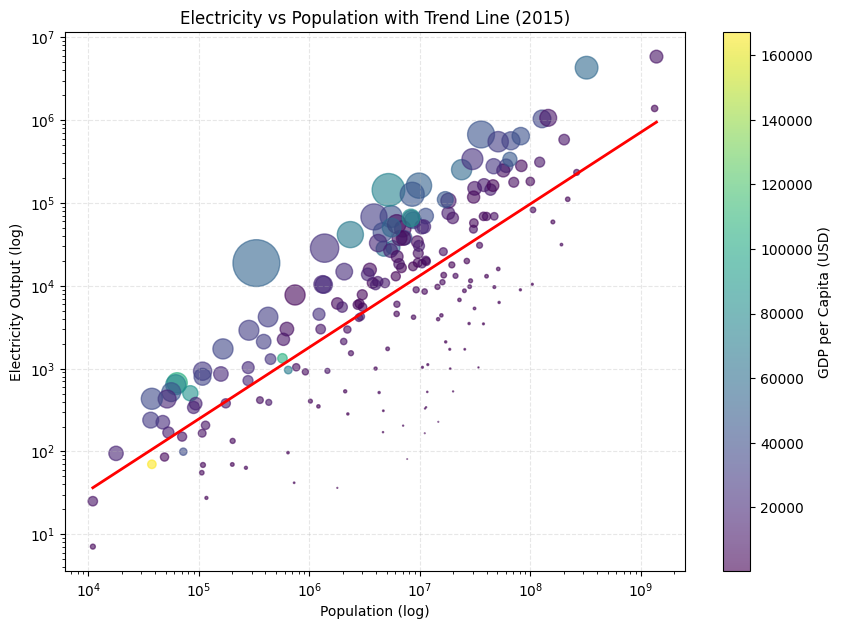

In [42]:
# Log transform for regression
x_log = np.log10(scatter_df["Total_Population"])
y_log = np.log10(scatter_df["Total_Electricity_Output_GWh"])

# Fit linear trend
coef = np.polyfit(x_log, y_log, 1)
trend = np.poly1d(coef)

plt.figure(figsize=(10,7))

plt.scatter(
    scatter_df["Total_Population"],
    scatter_df["Total_Electricity_Output_GWh"],
    s=scatter_df["Elec_Per_Capita_kWh"] / 50,
    c=scatter_df["GDP_Per_Capita_Current_USD"],
    cmap="viridis",
    alpha=0.6
)

# Plot regression line
x_vals = np.linspace(x_log.min(), x_log.max(), 100)
plt.plot(10**x_vals, 10**trend(x_vals), color="red", linewidth=2)

plt.xscale("log")
plt.yscale("log")

plt.title("Electricity vs Population with Trend Line (2015)")
plt.xlabel("Population (log)")
plt.ylabel("Electricity Output (log)")
plt.grid(True, linestyle="--", alpha=0.3)

plt.colorbar(label="GDP per Capita (USD)")
plt.show()

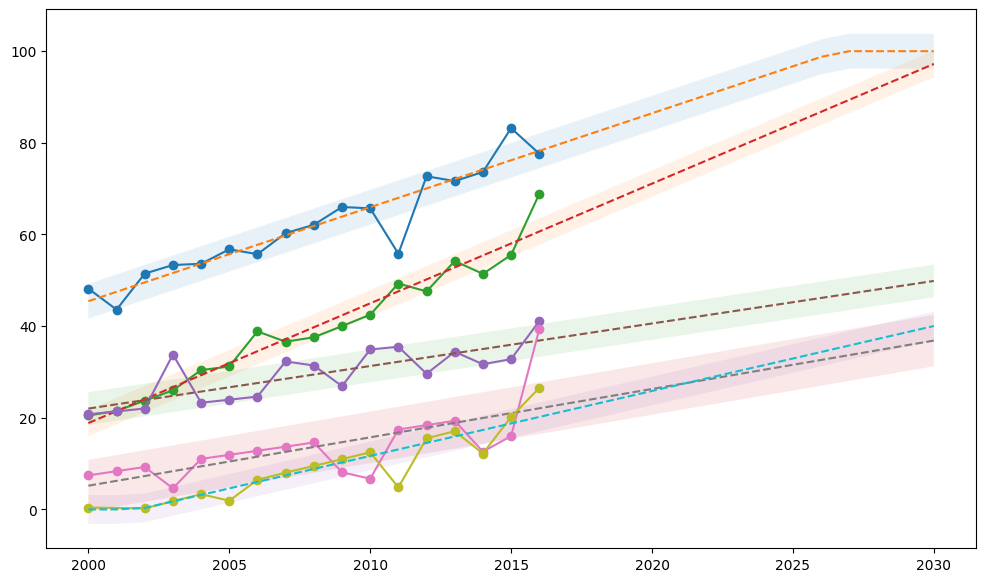

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

forecast_countries = ["India", "Bangladesh", "Nigeria", "Kenya", "Ethiopia"]

future_years = np.arange(2000, 2031)

plt.figure(figsize=(12,7))

for country in forecast_countries:

    # Filter country data
    cdata = df[
        (df["country"] == country) &
        df["Electricity_Access_Rural_Percentage"].notna()
    ].sort_values("date")

    if len(cdata) < 5:
        continue

    X = cdata["date"].values.reshape(-1, 1)
    y = cdata["Electricity_Access_Rural_Percentage"].values

    # Train model
    model = LinearRegression()
    model.fit(X, y)

    r2 = r2_score(y, model.predict(X))

    # Forecast
    X_future = future_years.reshape(-1, 1)
    y_pred = np.clip(model.predict(X_future), 0, 100)

    # Residual std for confidence band
    residual_std = np.std(y - model.predict(X))

    # Plot actual data
    plt.plot(cdata["date"], y, marker="o", linestyle="-",
             label=f"{country} Actual")

    # Plot forecast line
    plt.plot(future_years, y_pred, linestyle="--",
             label=f"{country} Forecast (R²={r2:.2f})")

    # Confidence band
    plt.fill_between(
        future_years,
        y_pred - residual_std,
        y_pred + residual_std,
        alpha=0.1
    )

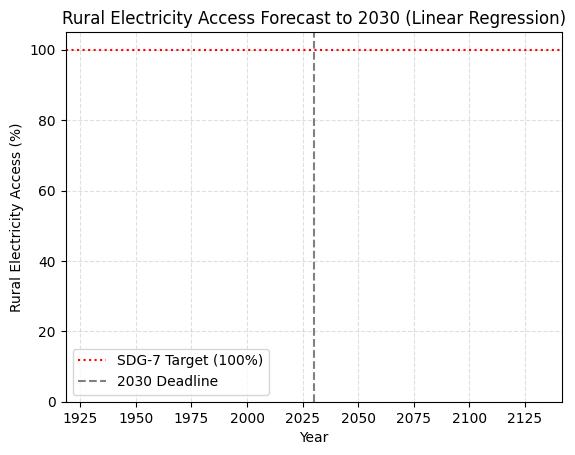

In [44]:
# SDG-7 Target line
plt.axhline(100, color="red", linestyle=":", label="SDG-7 Target (100%)")

# 2030 vertical line
plt.axvline(2030, color="gray", linestyle="--", label="2030 Deadline")

plt.title("Rural Electricity Access Forecast to 2030 (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("Rural Electricity Access (%)")
plt.ylim(0, 105)

plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

cluster_features = [
    "GDP_Per_Capita_Current_USD",
    "Electricity_Access_Urban_Percentage",
    "Electricity_Access_Rural_Percentage",
    "Total_Electricity_Output_GWh"
]

cluster_df = df[df["date"] == 2015][["country"] + cluster_features].dropna().copy()

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df[cluster_features])

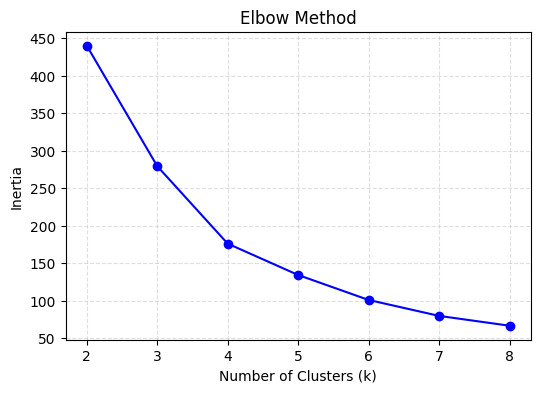

In [47]:
inertias = []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker="o", color="blue")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

In [48]:
km_final = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_df["Cluster"] = km_final.fit_predict(X_scaled)

In [49]:
cluster_means = (
    cluster_df.groupby("Cluster")["GDP_Per_Capita_Current_USD"]
    .mean()
    .sort_values(ascending=False)
)

labels = [
    "High-Income Fully Electrified",
    "Mid-Income Transitioning",
    "Emerging Economies (Partial)",
    "Low Access / Low Income"
]

label_map = {cluster: labels[i] for i, cluster in enumerate(cluster_means.index)}
cluster_df["Cluster_Label"] = cluster_df["Cluster"].map(label_map)

In [50]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

cluster_df["PC1"] = pcs[:, 0]
cluster_df["PC2"] = pcs[:, 1]

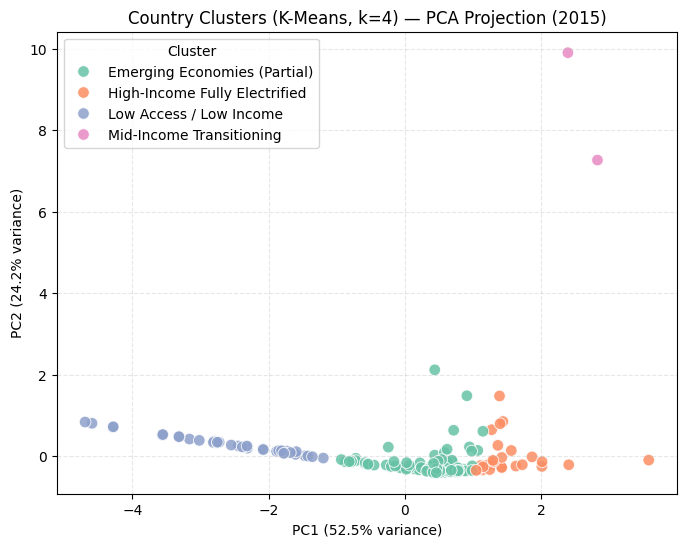

In [51]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=cluster_df,
    x="PC1",
    y="PC2",
    hue="Cluster_Label",
    palette="Set2",
    s=70,
    alpha=0.85
)

plt.title("Country Clusters (K-Means, k=4) — PCA Projection (2015)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="Cluster")
plt.show()

In [52]:
print("\nCluster Sizes:\n")
print(cluster_df["Cluster_Label"].value_counts())


Cluster Sizes:

Cluster_Label
Emerging Economies (Partial)     120
Low Access / Low Income           36
High-Income Fully Electrified     27
Mid-Income Transitioning           2
Name: count, dtype: int64


In [53]:
# Copy and reset index
sdg_df = rural_pivot.copy().reset_index()
sdg_df.columns = ["country", "Access_2000", "Access_2016", "Growth_pp", "Start_Level"]

# Historical growth (2000→2016)
sdg_df["Historical_Rate_pp_per_yr"] = sdg_df["Growth_pp"] / 16

# Required rate to reach 100% by 2030 (2016→2030)
sdg_df["Required_Rate_pp_per_yr"] = (100 - sdg_df["Access_2016"]) / 14

# Status assignment
sdg_df["Status"] = np.where(
    sdg_df["Access_2016"] >= 100, "✅ Already at 100%",
    np.where(
        sdg_df["Historical_Rate_pp_per_yr"] >= sdg_df["Required_Rate_pp_per_yr"],
        "🟡 On Track",
        "🔴 Off Track"
    )
)

# Quick summary
status_counts = sdg_df["Status"].value_counts()
print(f"Total countries analyzed: {len(sdg_df)}")
for s, c in status_counts.items():
    print(f"  {s}: {c}")

Total countries analyzed: 189
  ✅ Already at 100%: 105
  🔴 Off Track: 52
  🟡 On Track: 32


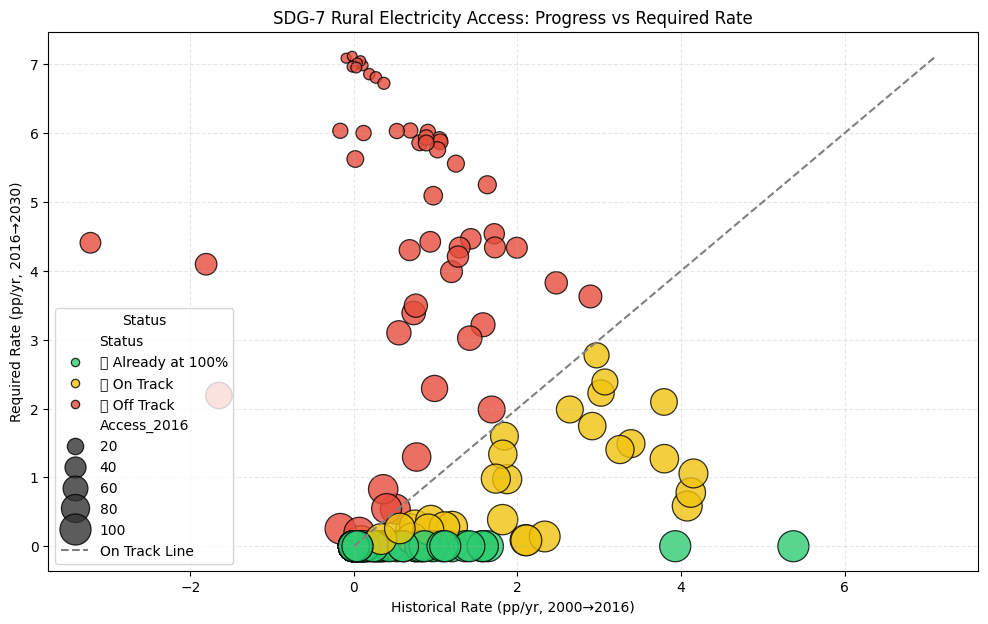

In [54]:
plt.figure(figsize=(12,7))

# Map status to color
status_colors = {
    "✅ Already at 100%": "#2ecc71",
    "🟡 On Track": "#f1c40f",
    "🔴 Off Track": "#e74c3c"
}

sns.scatterplot(
    data=sdg_df,
    x="Historical_Rate_pp_per_yr",
    y="Required_Rate_pp_per_yr",
    hue="Status",
    palette=status_colors,
    size="Access_2016",
    sizes=(50, 500),
    alpha=0.8,
    edgecolor="black"
)

# Reference line (Historical rate = Required rate)
plt.plot([0, sdg_df["Required_Rate_pp_per_yr"].max()],
         [0, sdg_df["Required_Rate_pp_per_yr"].max()],
         color="gray", linestyle="--", label="On Track Line")

plt.title("SDG-7 Rural Electricity Access: Progress vs Required Rate")
plt.xlabel("Historical Rate (pp/yr, 2000→2016)")
plt.ylabel("Required Rate (pp/yr, 2016→2030)")
plt.legend(title="Status")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

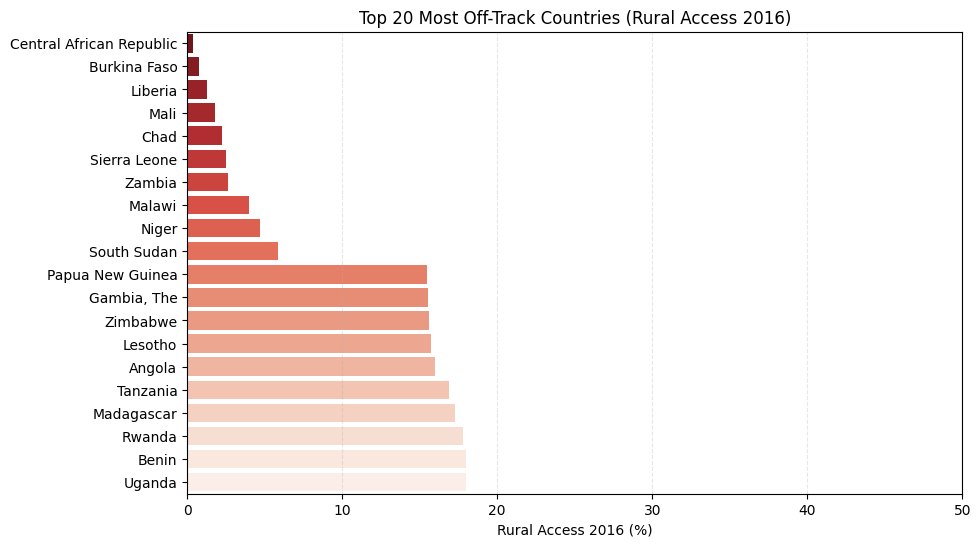

In [55]:
off_track = sdg_df[sdg_df["Status"] == "🔴 Off Track"].sort_values("Access_2016")
worst = off_track.nsmallest(20, "Access_2016")

plt.figure(figsize=(10,6))
sns.barplot(
    data=worst,
    x="Access_2016",
    y="country",
    palette="Reds_r"
)
plt.title("Top 20 Most Off-Track Countries (Rural Access 2016)")
plt.xlabel("Rural Access 2016 (%)")
plt.ylabel("")
plt.xlim(0, 50)
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.show()

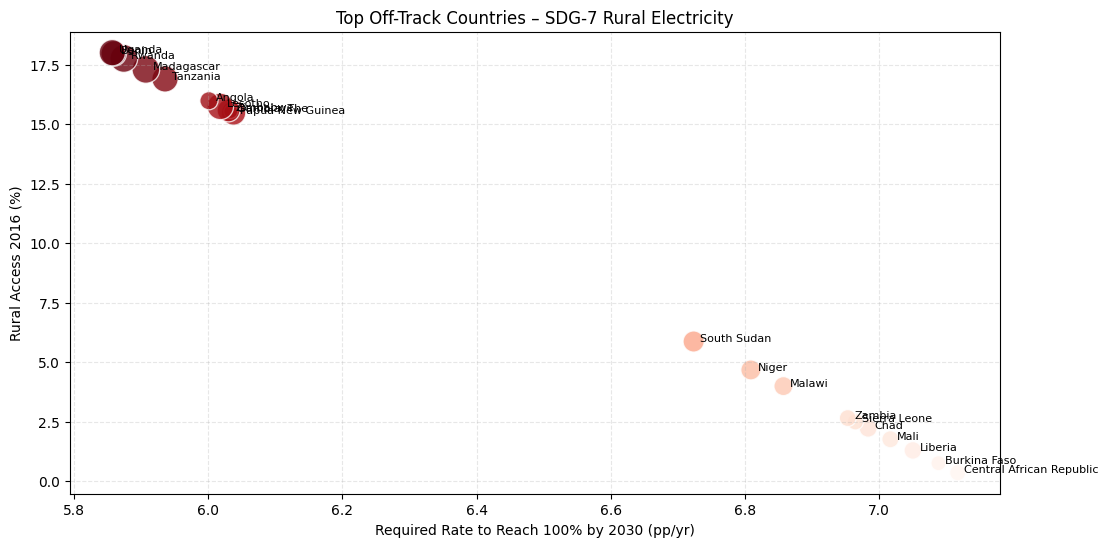

In [56]:
# Example: scatter plot with country labels for top off-track countries
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=worst,
    x="Required_Rate_pp_per_yr",
    y="Access_2016",
    size="Growth_pp",
    hue="Access_2016",
    palette="Reds",
    sizes=(100, 400),
    alpha=0.8,
    legend=False
)

for i, row in worst.iterrows():
    plt.text(row["Required_Rate_pp_per_yr"]+0.01, row["Access_2016"], row["country"], fontsize=8)

plt.xlabel("Required Rate to Reach 100% by 2030 (pp/yr)")
plt.ylabel("Rural Access 2016 (%)")
plt.title("Top Off-Track Countries – SDG-7 Rural Electricity")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

## Feature engg

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [58]:
features = [
    "GDP_Per_Capita_Current_USD",
    "Total_Population",
    "Population_Female_Percentage",
    "Population_Male_Percentage",
    "Electricity_Access_Urban_Percentage",
    "Electricity_Access_Rural_Percentage",
    "Total_Electricity_Output_GWh"
]

# Drop rows with missing values
data = df[features].dropna().copy()
data['Rural_Access_Label'] = pd.cut(
    data['Electricity_Access_Rural_Percentage'],
    bins=[0, 50, 75, 101],
    labels=["Low", "Medium", "High"]
)


In [59]:
le = LabelEncoder()
data['Rural_Access_Label_Enc'] = le.fit_transform(data['Rural_Access_Label'])

X = data[features]   # predictors
y = data['Rural_Access_Label_Enc']  # target

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Accuracy: 99.05%


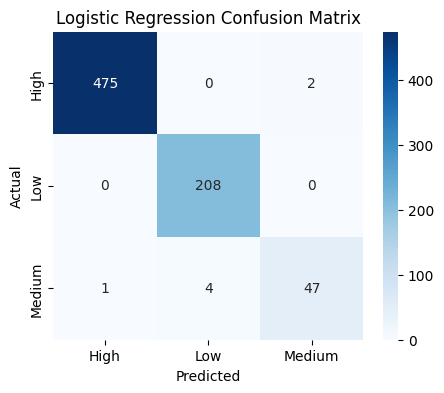


Decision Tree Accuracy: 100.00%


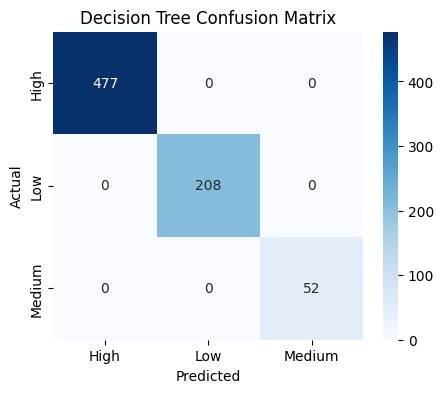


Random Forest Accuracy: 99.86%


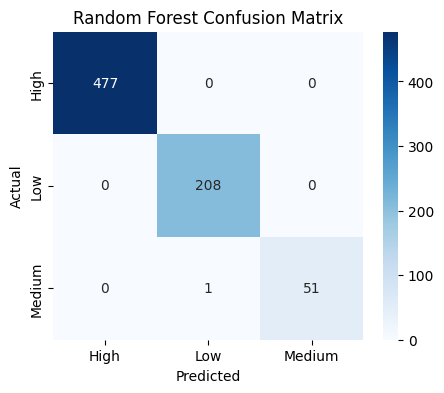


Gradient Boosting Accuracy: 100.00%


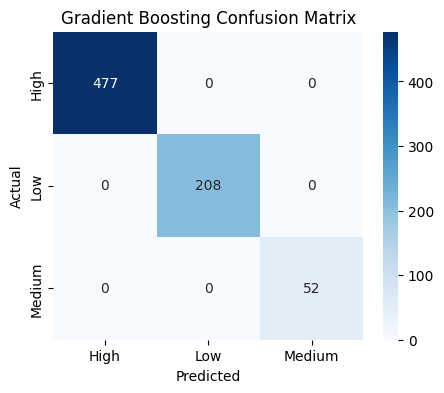


KNN Accuracy: 98.64%


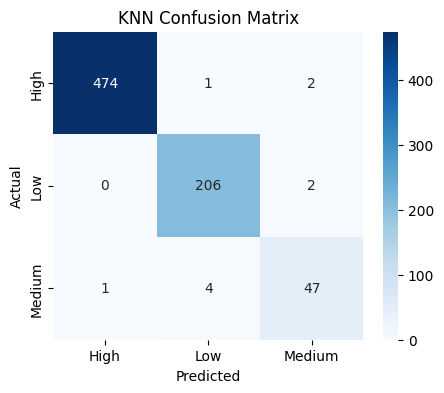


Naive Bayes Accuracy: 93.76%


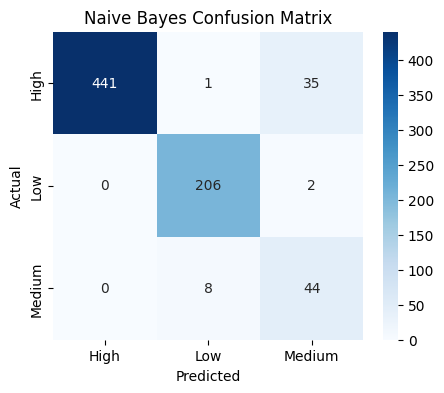


SVM Accuracy: 99.19%


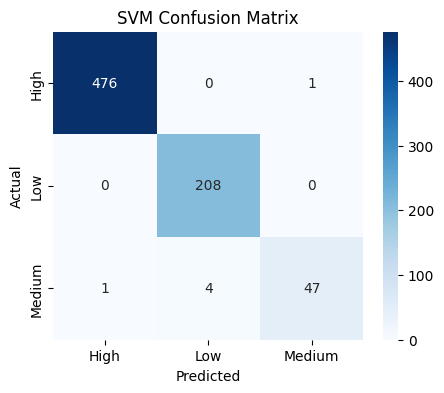

In [62]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred) * 100
    results[name] = acc
    
    print(f"\n{name} Accuracy: {acc:.2f}%")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [63]:
summary = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy (%)"]).sort_values(by="Accuracy (%)", ascending=False)
print("\n✅ All Model Accuracy Summary:")
display(summary)


✅ All Model Accuracy Summary:


,Model,Accuracy (%)
1,Decision Tree,100.000000
3,Gradient Boosting,100.000000
2,Random Forest,99.864315
6,SVM,99.185889
0,Logistic Regression,99.050204
4,KNN,98.643148
5,Naive Bayes,93.758480


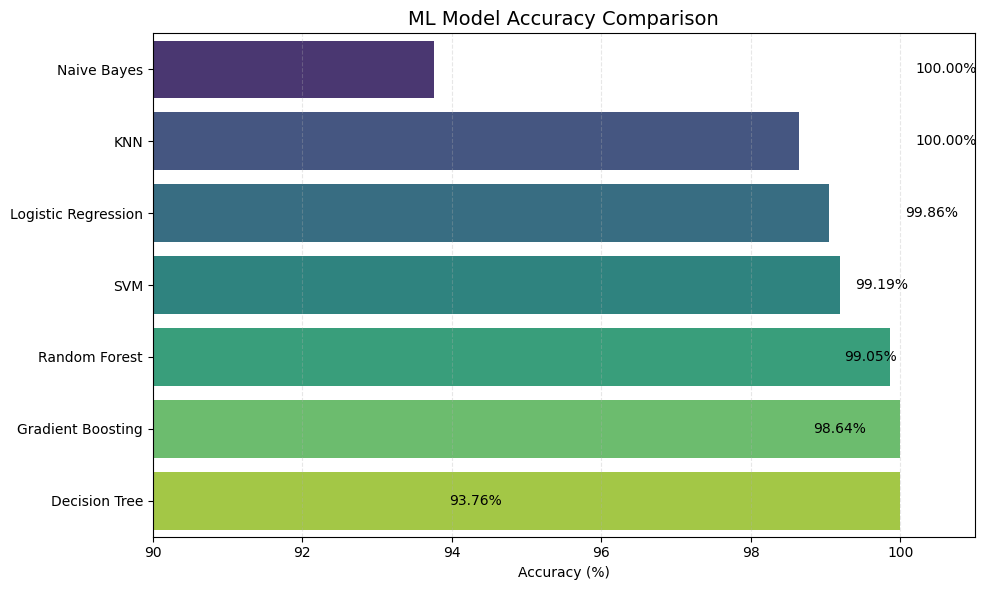

In [64]:
summary = pd.DataFrame({
    "Model": [
        "Decision Tree", "Gradient Boosting", "Random Forest",
        "SVM", "Logistic Regression", "KNN", "Naive Bayes"
    ],
    "Accuracy (%)": [
        100.0, 100.0, 99.86, 99.19, 99.05, 98.64, 93.76
    ]
})

# Sort by accuracy
summary = summary.sort_values("Accuracy (%)", ascending=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x="Accuracy (%)", 
    y="Model", 
    data=summary, 
    palette="viridis"
)

plt.title("ML Model Accuracy Comparison", fontsize=14)
plt.xlabel("Accuracy (%)")
plt.ylabel("")
plt.xlim(90, 101)
plt.grid(axis="x", linestyle="--", alpha=0.3)

# Show values on bars
for index, row in summary.iterrows():
    plt.text(row["Accuracy (%)"] + 0.2, index, f"{row['Accuracy (%)']:.2f}%", va='center')

plt.tight_layout()
plt.show()

## Thank you..pls upvote!!!!!!!!!